# Exodus Wallet Transaction History Analysis

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [4]:
#Convert into a pandas dataframe
data = pd.read_csv('exodus_0-all-txs-2024-09-20_21-17-11 - Copy.csv')


In [5]:
# Clean the data by dropping rows with NaN values and removing unnecessary blanks
cleaned_data = data.dropna(how='all')  # Drop rows where all values are NaN
cleaned_data = cleaned_data.dropna(subset=['FROMPORTFOLIO', 'TOPORTFOLIO', 'OUTAMOUNT', 'INAMOUNT'], how='all')  # Drop rows with NaN in key columns


In [6]:
# Remove any blank spaces from string columns
cleaned_data = cleaned_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



In [7]:
# Remove columns with sensitive or incomplete data (wallet addresses, transaction IDs, URLs)
columns_to_remove = ['TOADDRESS', 'OUTTXID', 'OUTTXURL', 'INTXID', 'INTXURL', 'ORDERID', 'PERSONALNOTE', 'Unnamed: 17']
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

In [8]:

# Filter relevant columns for analysis (inflows and outflows)
relevant_data = cleaned_data[['DATE', 'TYPE', 'OUTAMOUNT', 'INAMOUNT', 'OUTCURRENCY', 'INCURRENCY']]
display(relevant_data)

,DATE,TYPE,OUTAMOUNT,INAMOUNT,OUTCURRENCY,INCURRENCY
0,2021-06-16T23:12:10.000Z,deposit,NaN,18.836530,NaN,ADA
1,2021-06-16T23:15:31.000Z,deposit,NaN,275.614078,NaN,ADA
2,2021-06-16T23:16:15.000Z,deposit,NaN,0.000000,NaN,ADA
3,2021-06-16T23:25:35.000Z,deposit,NaN,0.007269,NaN,BTC
4,2021-06-16T23:26:01.000Z,deposit,NaN,0.281334,NaN,ETH
...,...,...,...,...,...,...
311,2024-09-05T16:21:16.000Z,withdrawal,-0.083239,NaN,ETH,NaN
312,2024-09-09T19:28:22.000Z,withdrawal,-0.003455,NaN,BTC,NaN
313,2024-09-19T21:24:34.000Z,withdrawal,0.000000,NaN,ETH,NaN
314,2024-09-20T00:18:09.000Z,withdrawal,-0.001054,NaN,BTC,NaN


# Summarise Inflows and Outflows by Time
## First, ensure the DATE column is in a datetime format:

In [9]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract year, month, week, day for analysis
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['WEEK'] = data['DATE'].dt.isocalendar().week
data['DAY'] = data['DATE'].dt.day


# Next, summarize the inflows (deposits) and outflows (withdrawals) on different time scales:

In [10]:

# Group data by year, month, week, and day
# Summarize inflows and outflows on a daily, weekly, monthly, and yearly basis
inflows = data[data['TYPE'] == 'deposit'].groupby(['YEAR', 'MONTH', 'DAY'])['INAMOUNT'].sum()
outflows = data[data['TYPE'] == 'withdrawal'].groupby(['YEAR', 'MONTH', 'DAY'])['OUTAMOUNT'].sum()

# You can similarly group by WEEK or MONTH if needed
monthly_inflows = data[data['TYPE'] == 'deposit'].groupby(['YEAR', 'MONTH'])['INAMOUNT'].sum()
monthly_outflows = data[data['TYPE'] == 'withdrawal'].groupby(['YEAR', 'MONTH'])['OUTAMOUNT'].sum()


# Check the Distribution of Transaction Amounts and Frequency


C:\Users\Student\AppData\Local\Temp\ipykernel_9100\698178691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['DATE'] = pd.to_datetime(relevant_data['DATE'])


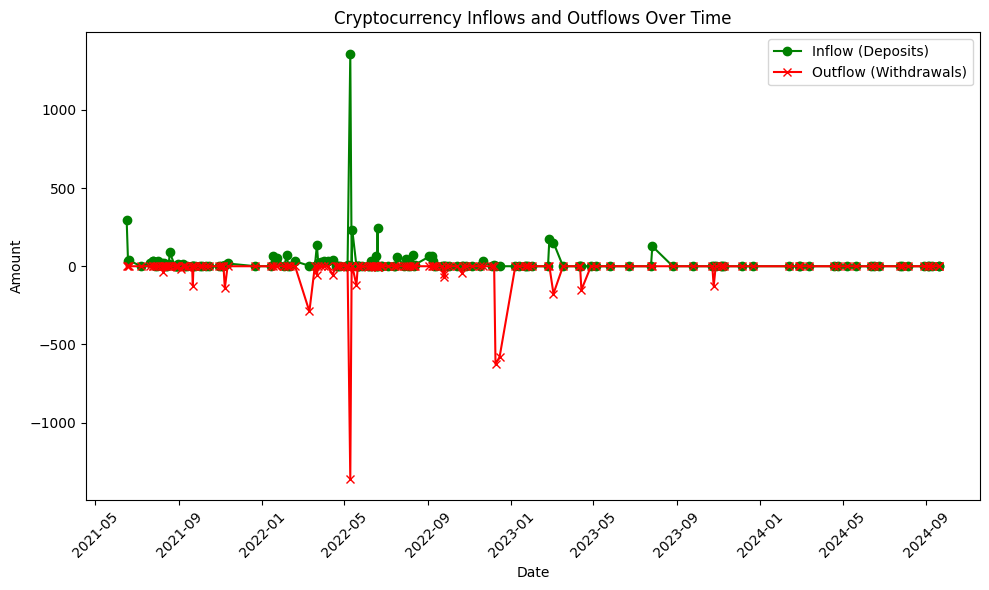

In [11]:
# Convert DATE column to datetime for time-based analysis
relevant_data['DATE'] = pd.to_datetime(relevant_data['DATE'])

# Group by date and sum the inflows and outflows (only numeric columns)
grouped_data = relevant_data.groupby(relevant_data['DATE'].dt.date)[['OUTAMOUNT', 'INAMOUNT']].sum()

# Plot inflows and outflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['INAMOUNT'], label='Inflow (Deposits)', color='green', marker='o')
plt.plot(grouped_data.index, grouped_data['OUTAMOUNT'], label='Outflow (Withdrawals)', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Inflows and Outflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

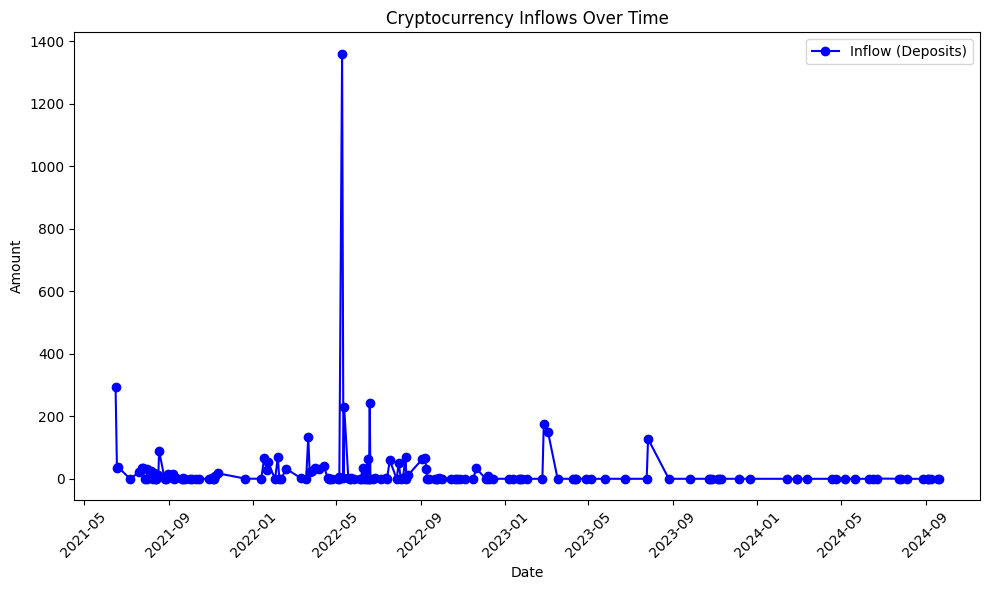

In [12]:
# Plot inflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['INAMOUNT'], label='Inflow (Deposits)', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Inflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

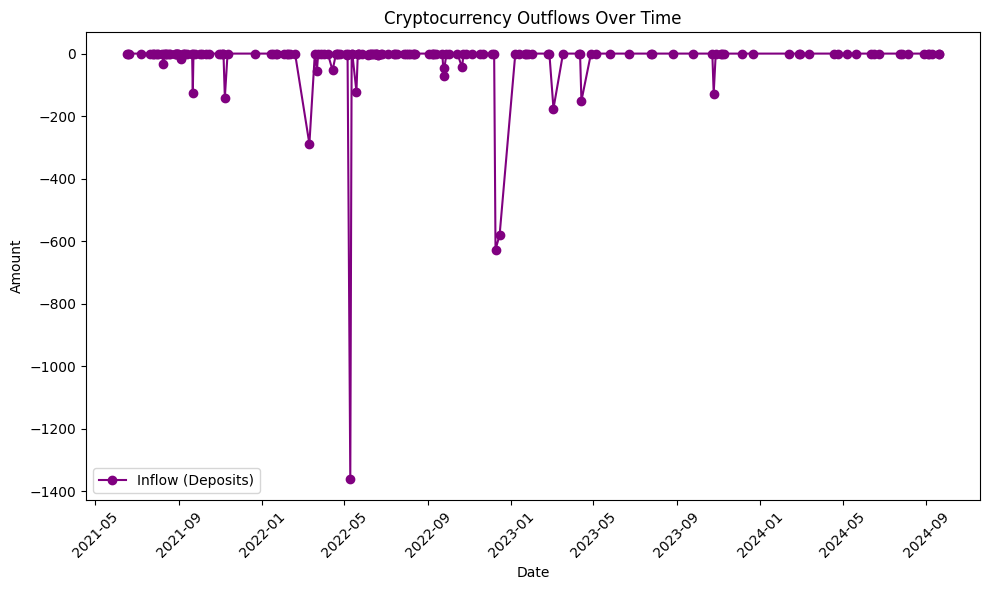

In [13]:
# Plot inflows and outflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['OUTAMOUNT'], label='Inflow (Deposits)', color='purple', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Outflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

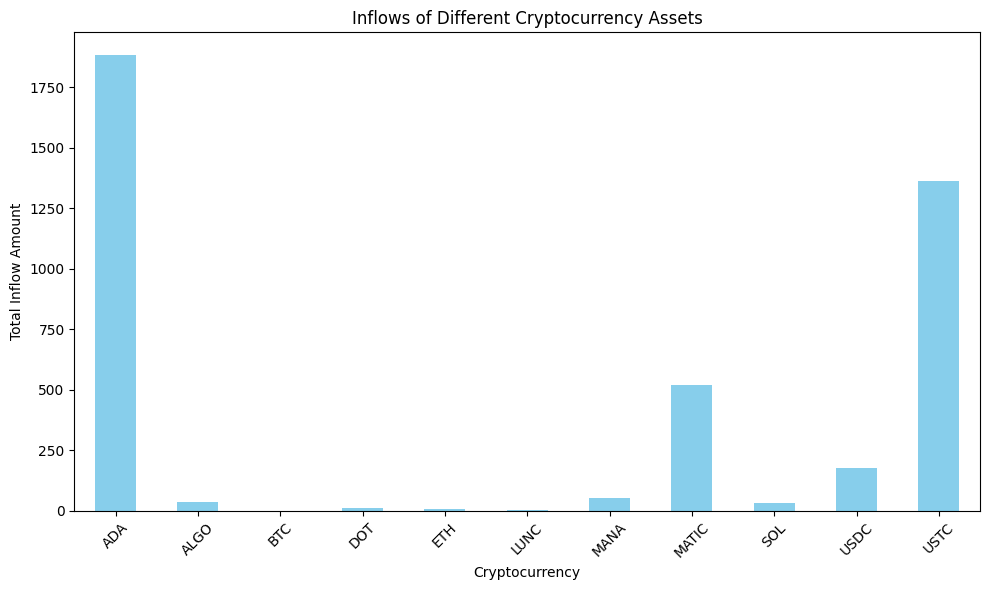

In [14]:
# Group data by currency and sum inflows (INAMOUNT) for each cryptocurrency asset
asset_inflows = relevant_data.groupby('INCURRENCY')['INAMOUNT'].sum()

# Plot a bar chart for inflows of different cryptocurrency assets
plt.figure(figsize=(10, 6))
asset_inflows.plot(kind='bar', color='skyblue')
plt.title('Inflows of Different Cryptocurrency Assets')
plt.xlabel('Cryptocurrency')
plt.ylabel('Total Inflow Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


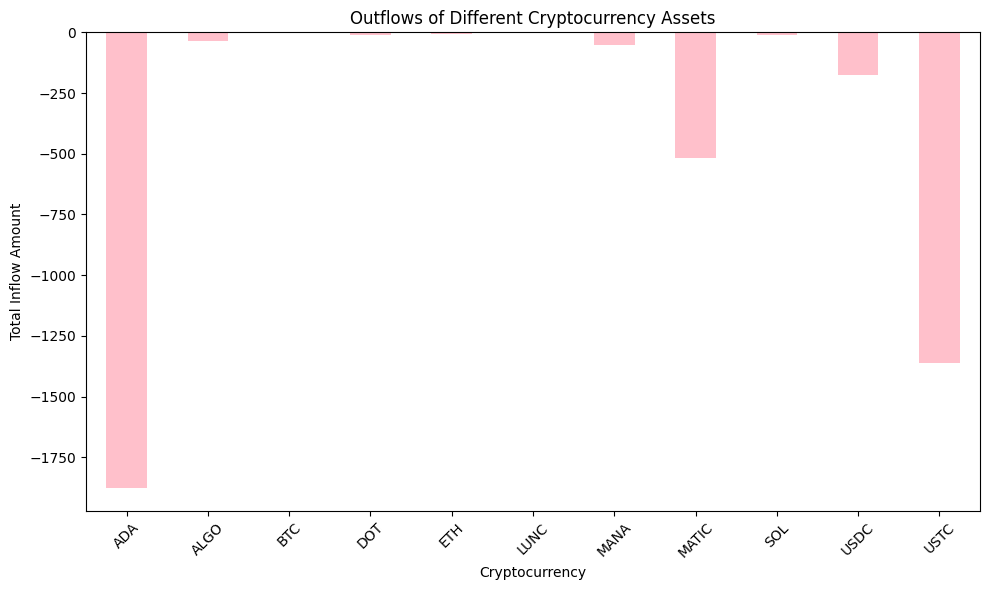

In [15]:
# Group data by currency and sum inflows (INAMOUNT) for each cryptocurrency asset
asset_inflows = relevant_data.groupby('OUTCURRENCY')['OUTAMOUNT'].sum()

# Plot a bar chart for inflows of different cryptocurrency assets
plt.figure(figsize=(10, 6))
asset_inflows.plot(kind='bar', color='pink')
plt.title('Outflows of Different Cryptocurrency Assets')
plt.xlabel('Cryptocurrency')
plt.ylabel('Total Inflow Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


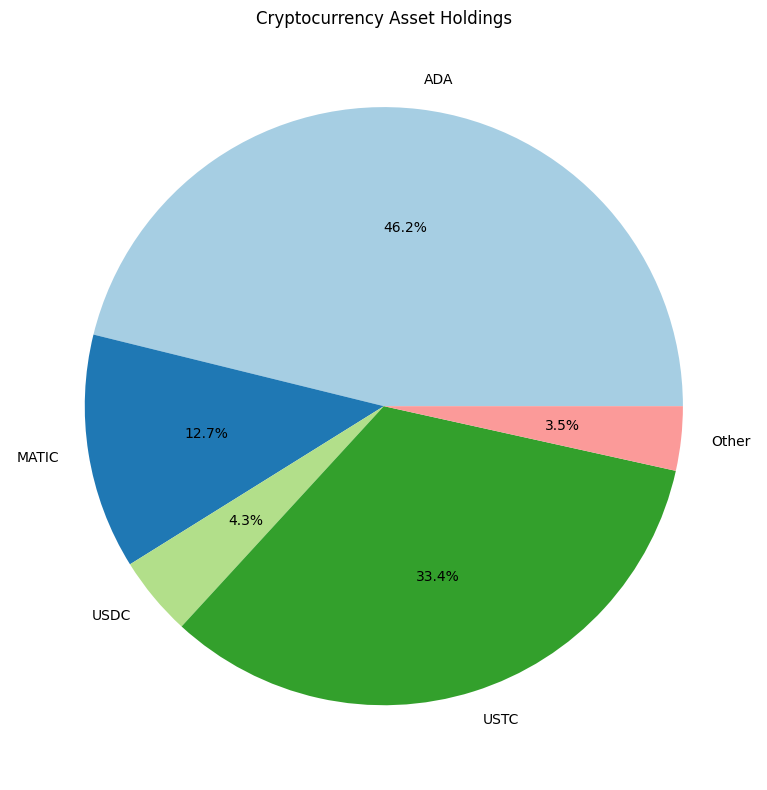

In [16]:
# Group data by currency and sum inflows (INAMOUNT) for each cryptocurrency asset
asset_inflows = relevant_data.groupby('INCURRENCY')['INAMOUNT'].sum()

# Calculate the total inflow for all assets
total_inflow = asset_inflows.sum()

# Calculate the percentage of each asset
asset_percentages = (asset_inflows / total_inflow) * 100

# Separate out assets with less than 2% holding and group them as "Other"
asset_percentages['Other'] = asset_percentages[asset_percentages < 2].sum()
asset_percentages = asset_percentages[asset_percentages >= 2]
asset_percentages['Other'] = asset_percentages.get('Other', 0)  # Ensure 'Other' exists

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(asset_percentages, labels=asset_percentages.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Cryptocurrency Asset Holdings')
plt.tight_layout()
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_9100\1962420032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['NET_BALANCE'] = relevant_data['INAMOUNT'] - relevant_data['OUTAMOUNT']


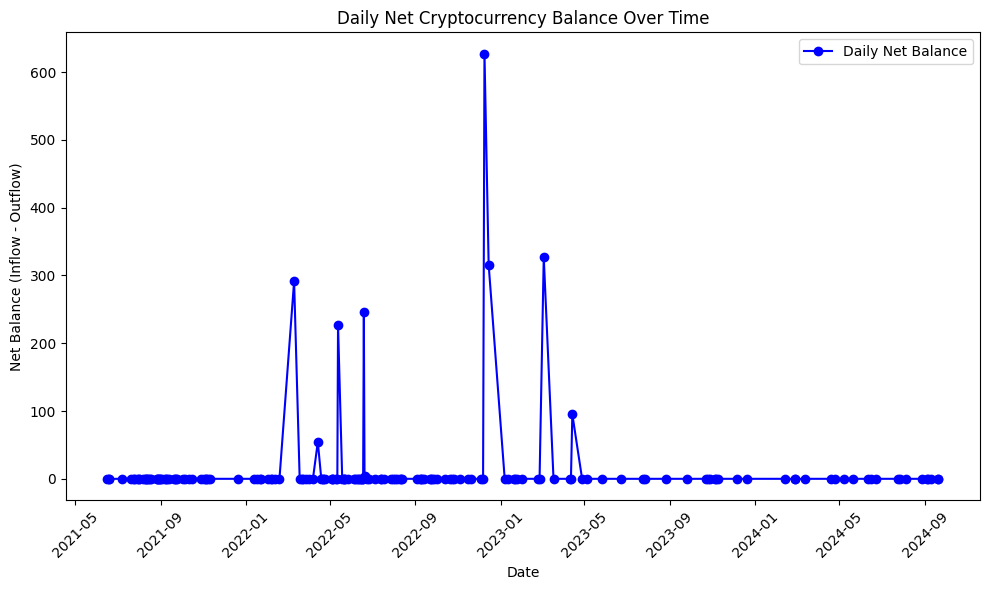

In [17]:
# Time Series Analysis: Daily Net Balance (Inflow - Outflow)
# Calculate the daily net balance (Inflow - Outflow)
relevant_data['NET_BALANCE'] = relevant_data['INAMOUNT'] - relevant_data['OUTAMOUNT']

# Group by date and sum the net balance
daily_net_balance = relevant_data.groupby(relevant_data['DATE'].dt.date)['NET_BALANCE'].sum()

# Plot the time series for daily net balance
plt.figure(figsize=(10, 6))
plt.plot(daily_net_balance.index, daily_net_balance, label='Daily Net Balance', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Net Balance (Inflow - Outflow)')
plt.title('Daily Net Cryptocurrency Balance Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_9100\1383019388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['CUMULATIVE_INAMOUNT'] = relevant_data['INAMOUNT'].cumsum()
C:\Users\Student\AppData\Local\Temp\ipykernel_9100\1383019388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['CUMULATIVE_OUTAMOUNT'] = relevant_data['OUTAMOUNT'].cumsum()


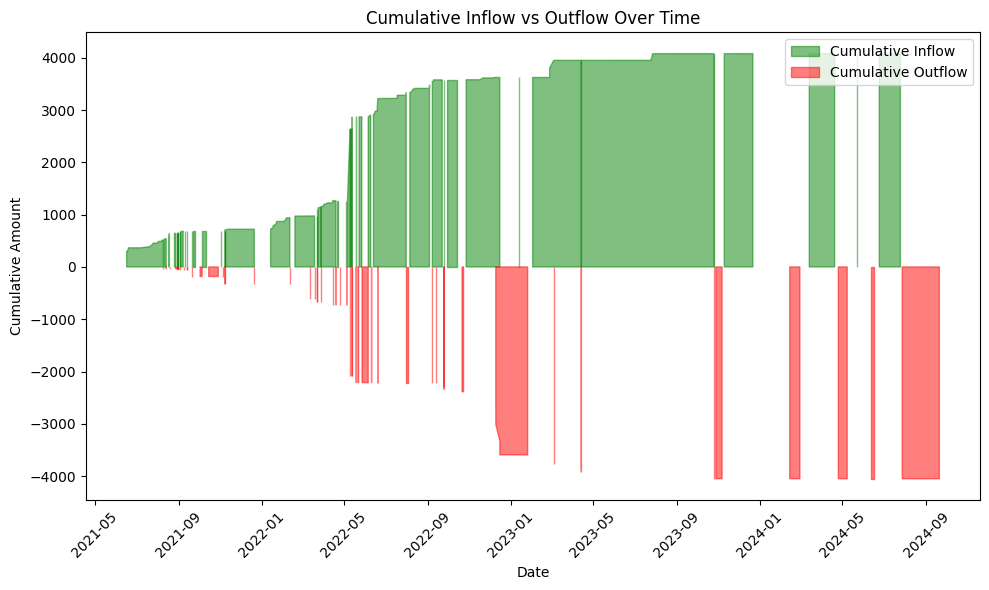

In [18]:
# Stacked Area Plot: Cumulative Inflow vs Outflow

# Calculate cumulative sums of inflows and outflows
relevant_data['CUMULATIVE_INAMOUNT'] = relevant_data['INAMOUNT'].cumsum()
relevant_data['CUMULATIVE_OUTAMOUNT'] = relevant_data['OUTAMOUNT'].cumsum()

# Plot a stacked area chart
plt.figure(figsize=(10, 6))
plt.fill_between(relevant_data['DATE'], relevant_data['CUMULATIVE_INAMOUNT'], label='Cumulative Inflow', color='green', alpha=0.5)
plt.fill_between(relevant_data['DATE'], relevant_data['CUMULATIVE_OUTAMOUNT'], label='Cumulative Outflow', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Cumulative Amount')
plt.title('Cumulative Inflow vs Outflow Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


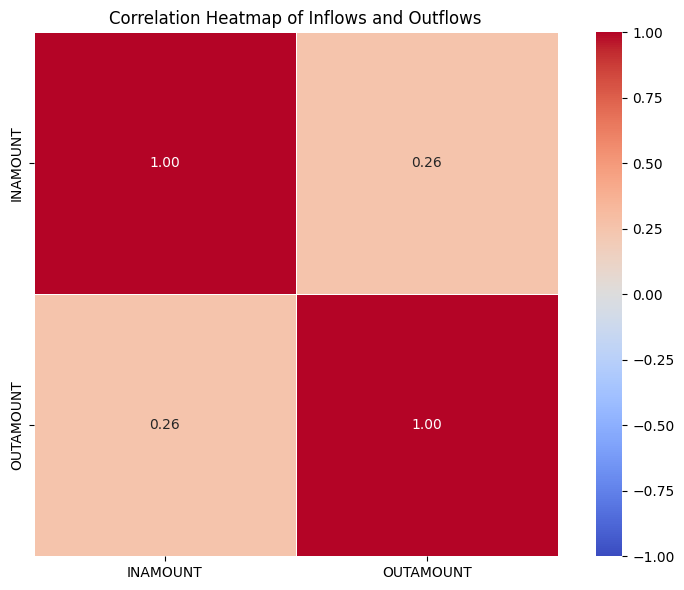

In [19]:


# Compute correlation matrix for cryptocurrency inflows and outflows
correlation_matrix = relevant_data[['INAMOUNT', 'OUTAMOUNT']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Inflows and Outflows')
plt.tight_layout()
plt.show()
